# Imports

In [1]:
import pandas as pd

# Load data

In [33]:
# define data path to endangered species csv file
endagered_species_data_path = "../Data/species-listings-by-tax-group-report_animals_and_plants_optimized.csv"

# define data path to wd_species csv file
wd_species_data_path = "../Data/wikidata/wd_species_df.csv"

# define data path to biodiversity csv file
biodiversity_data_path = "../Data/biodiversity.csv"

In [41]:
endagered_species = pd.read_csv(endagered_species_data_path)
wd = pd.read_csv(wd_species_data_path)
biodiversity = pd.read_csv(biodiversity_data_path)

# Data inspection

<AxesSubplot:>

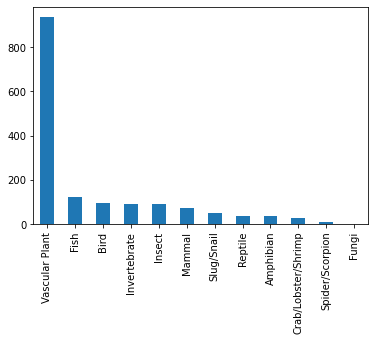

In [4]:
endagered_species['category'].value_counts().plot(kind='bar')

<AxesSubplot:>

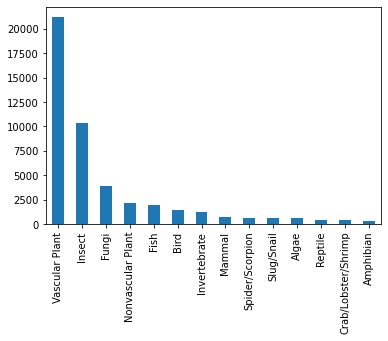

In [7]:
biodiversity['Category'].value_counts().plot(kind='bar')

# Category Mapping

## Map wd data set categories

In [37]:
# read mapping from excel sheet
category_mapping_df = pd.read_excel('../Data/CategoryMapping.xlsx')

# remove leading and training blanks as well as additional characters at the beginning and the end of the strings
def clean_wd (sample_str):
    sample_str = sample_str.strip()
    sample_str = sample_str[0:-5]
    sample_str = sample_str[1:-1]
    return sample_str

# apply function to loaded data frame
category_mapping_df['Original Category Label'] = category_mapping_df['Original Category Label'].apply(lambda x: clean_wd(x))

# create mapping dictionary of of the data frame
wd_mapping_dic = dict(zip(category_mapping_df['Original Category Label'], category_mapping_df['Category Mapping']))

In [42]:
wd

,class,classLabel,conservationStatus,conservationStatusLabel,differentFrom,differentFromLabel,endemicTo,endemicToLabel,family,familyLabel,order,orderLabel,resource,taxonCommonName,taxonName
0,"['http://www.wikidata.org/entity/q7377', 'http...",Mammal,http://www.wikidata.org/entity/q278113,vulnerable,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/q25265,felidae,http://www.wikidata.org/entity/q25306,carnivora,http://www.wikidata.org/entity/q140,"['lion', 'african lion']",panthera leo
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/q146030,rutaceae,http://www.wikidata.org/entity/q26316,sapindales,http://www.wikidata.org/entity/q500,citrus ×limon,citrus ×limon
2,http://www.wikidata.org/entity/q343460,Fish,http://www.wikidata.org/entity/q211005,least concern,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/q726399,osphronemidae,http://www.wikidata.org/entity/q1744606,anabantiformes,http://www.wikidata.org/entity/q518,betta edithae,betta edithae
3,http://www.wikidata.org/entity/q343460,Fish,http://www.wikidata.org/entity/q278113,vulnerable,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/q726399,osphronemidae,http://www.wikidata.org/entity/q1744606,anabantiformes,http://www.wikidata.org/entity/q526,betta brownorum,betta brownorum
4,http://www.wikidata.org/entity/q343460,Fish,http://www.wikidata.org/entity/q11394,endangered,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/q726399,osphronemidae,http://www.wikidata.org/entity/q1744606,anabantiformes,http://www.wikidata.org/entity/q533,betta channoides,betta channoides
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,http://www.wikidata.org/entity/q1390,Insect,NaN,NaN,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/q547092,aderidae,http://www.wikidata.org/entity/q22671,coleoptera,http://www.wikidata.org/entity/q2186906,aderus paulonotatus,aderus paulonotatus
99996,http://www.wikidata.org/entity/q1390,Insect,NaN,NaN,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/q205295,cerambycidae,http://www.wikidata.org/entity/q22671,coleoptera,http://www.wikidata.org/entity/q2186908,nemognathomimus pallidulus,nemognathomimus pallidulus
99997,http://www.wikidata.org/entity/q1390,Insect,NaN,NaN,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/q28457,elateridae,http://www.wikidata.org/entity/q22671,coleoptera,http://www.wikidata.org/entity/q2186909,cardiophorus obtusus,cardiophorus obtusus
99998,http://www.wikidata.org/entity/q3382659,Invertebrate,NaN,NaN,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/q16945659,otobothriidae,http://www.wikidata.org/entity/q3388246,trypanorhyncha,http://www.wikidata.org/entity/q2186910,otobothrium penetrans,otobothrium penetrans


In [39]:
wd['classLabel']= wd['classLabel'].map(wd_mapping_dic)

In [44]:
wd

,class,classLabel,conservationStatus,conservationStatusLabel,differentFrom,differentFromLabel,endemicTo,endemicToLabel,family,familyLabel,order,orderLabel,resource,taxonCommonName,taxonName
0,"['http://www.wikidata.org/entity/q7377', 'http...",Mammal,http://www.wikidata.org/entity/q278113,vulnerable,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/q25265,felidae,http://www.wikidata.org/entity/q25306,carnivora,http://www.wikidata.org/entity/q140,"['lion', 'african lion']",panthera leo
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/q146030,rutaceae,http://www.wikidata.org/entity/q26316,sapindales,http://www.wikidata.org/entity/q500,citrus ×limon,citrus ×limon
2,http://www.wikidata.org/entity/q343460,Fish,http://www.wikidata.org/entity/q211005,least concern,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/q726399,osphronemidae,http://www.wikidata.org/entity/q1744606,anabantiformes,http://www.wikidata.org/entity/q518,betta edithae,betta edithae
3,http://www.wikidata.org/entity/q343460,Fish,http://www.wikidata.org/entity/q278113,vulnerable,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/q726399,osphronemidae,http://www.wikidata.org/entity/q1744606,anabantiformes,http://www.wikidata.org/entity/q526,betta brownorum,betta brownorum
4,http://www.wikidata.org/entity/q343460,Fish,http://www.wikidata.org/entity/q11394,endangered,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/q726399,osphronemidae,http://www.wikidata.org/entity/q1744606,anabantiformes,http://www.wikidata.org/entity/q533,betta channoides,betta channoides
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,http://www.wikidata.org/entity/q1390,Insect,NaN,NaN,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/q547092,aderidae,http://www.wikidata.org/entity/q22671,coleoptera,http://www.wikidata.org/entity/q2186906,aderus paulonotatus,aderus paulonotatus
99996,http://www.wikidata.org/entity/q1390,Insect,NaN,NaN,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/q205295,cerambycidae,http://www.wikidata.org/entity/q22671,coleoptera,http://www.wikidata.org/entity/q2186908,nemognathomimus pallidulus,nemognathomimus pallidulus
99997,http://www.wikidata.org/entity/q1390,Insect,NaN,NaN,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/q28457,elateridae,http://www.wikidata.org/entity/q22671,coleoptera,http://www.wikidata.org/entity/q2186909,cardiophorus obtusus,cardiophorus obtusus
99998,http://www.wikidata.org/entity/q3382659,Invertebrate,NaN,NaN,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/q16945659,otobothriidae,http://www.wikidata.org/entity/q3388246,trypanorhyncha,http://www.wikidata.org/entity/q2186910,otobothrium penetrans,otobothrium penetrans


<AxesSubplot:>

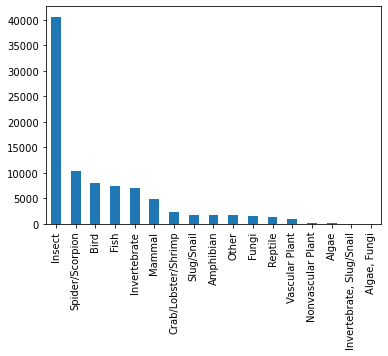

In [43]:
wd['classLabel'].value_counts().plot(kind='bar')

In [16]:
wd[wd['classLabel'] == "nan"].value_counts()

Series([], dtype: int64)

## Map endangered_species data set categories

In [17]:
  
# create dictionatry for mapping
mapping_dic = {'Mammals':'Mammal',
                'Birds':'Bird',
                'Insects':'Insect',
                'Fishes':'Fish',
                'Reptiles':'Reptile',
                'Clams':'Invertebrate',
                'Snails':'Slug/Snail',
                'Arachnids':'Spider/Scorpion',
                'Amphibians':'Amphibian',
                'Crustaceans':'Crab/Lobster/Shrimp',
                'Lichens':'Fungi',
                'Ferns and Allies':'Vascular Plant',
                'Flowering Plants':'Vascular Plant',
                'Conifers and Cycads':'Vascular Plant'        
}

In [18]:
endagered_species['category'] = endagered_species['category'].map(mapping_dic)

<AxesSubplot:>

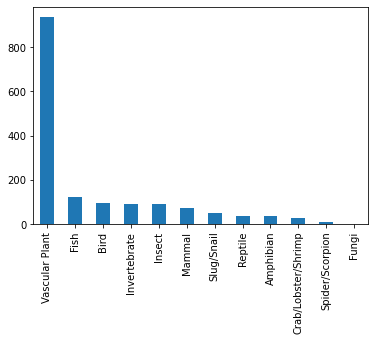

In [45]:
endagered_species['category'].value_counts().plot(kind='bar')

# Further data inspection

<AxesSubplot:>

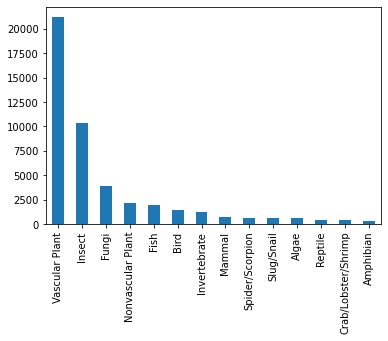

In [21]:
# histogram of combined data
combined_categories = wd['classLabel'].append(endagered_species['category'].append(biodiversity['Category']))
combined_categories.value_counts().plot(kind='bar')

In [22]:
combined_categories

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
46042        Insect
46043        Insect
46044        Insect
46045        Insect
46046    Slug/Snail
Length: 147622, dtype: object

In [23]:
endagered_species

,id,scientific_name,common_name,where_listed,region_name,region,esa_listing_status,category
0,ES570,Abronia macrocarpa,Large-fruited sand-verbena,Wherever found,Southwest,2,Endangered,NaN
1,ES458,Abutilon eremitopetalum,No common name,Wherever found,Pacific,1,Endangered,NaN
2,ES484,Abutilon menziesii,Ko`oloa`ula,Wherever found,Pacific,1,Endangered,NaN
3,ES15,Abutilon sandwicense,No common name,Wherever found,Pacific,1,Endangered,NaN
4,ES151,Acaena exigua,Liliwai,Wherever found,Pacific,1,Endangered,NaN
...,...,...,...,...,...,...,...,...
1570,ES1339,Zapus hudsonius preblei,Preble's meadow jumping mouse,wherever found,Mountain-Prairie,6,Threatened,NaN
1571,ES303,Zizania texana,Texas wild-rice,Wherever found,Southwest,2,Endangered,NaN
1572,ES322,Ziziphus celata,Florida ziziphus,Wherever found,Southeast,4,Endangered,NaN
1573,ES1301,Zosterops conspicillatus conspicillatus,Bridled white-eye,Wherever found,Pacific,1,Endangered,NaN


In [24]:
wd[wd['classLabel'] == 'Insect']

,class,classLabel,conservationStatus,conservationStatusLabel,differentFrom,differentFromLabel,endemicTo,endemicToLabel,family,familyLabel,order,orderLabel,resource,taxonCommonName,taxonName


In [25]:
biodiversity

,ID,Provenance,Scientific_Name,Category,Orders,Families,Park_Names,Common_Names,Listing_Statuses,States
0,BIO00000,BiodiversityUSNationalParks,Aaptolasma,Crab/Lobster/Shrimp,['Sessilia'],['Bathylasmatidae'],['Cuyahoga Valley National Park'],NaN,NaN,['OH']
1,BIO00001,BiodiversityUSNationalParks,Abacidus,Insect,['Coleoptera'],['Carabidae'],['Rocky Mountain National Park'],NaN,NaN,['CO']
2,BIO00002,BiodiversityUSNationalParks,Abaeis nicippe,Insect,['Lepidoptera'],['Pieridae'],"['Shenandoah National Park', 'Grand Canyon Nat...",['Sleepy Orange'],NaN,"['VA', 'AZ', 'CO']"
3,BIO00003,BiodiversityUSNationalParks,Abagrotis discoidalis,Insect,['Lepidoptera'],['Noctuidae'],['Great Basin National Park'],NaN,NaN,['NV']
4,BIO00004,BiodiversityUSNationalParks,Abagrotis duanca,Insect,['Lepidoptera'],['Noctuidae'],['Great Basin National Park'],NaN,NaN,['NV']
...,...,...,...,...,...,...,...,...,...,...
46042,BIO46042,BiodiversityUSNationalParks,Zyxaphis filifoliae,Insect,['Hemiptera'],['Aphididae'],['Great Basin National Park'],NaN,NaN,['NV']
46043,BIO46043,BiodiversityUSNationalParks,"nr. Bledius, sp.111",Insect,['Coleoptera'],['Staphylinidae'],['Yellowstone National Park'],NaN,NaN,"['WY', 'ID', 'MT']"
46044,BIO46044,BiodiversityUSNationalParks,nr. Cercyon sp. 26,Insect,['Coleoptera'],['Hydrophilidae'],['Yellowstone National Park'],NaN,NaN,"['WY', 'ID', 'MT']"
46045,BIO46045,BiodiversityUSNationalParks,ormosia scleroprocta,Insect,['Diptera'],['Tipulidae'],['Yellowstone National Park'],NaN,NaN,"['WY', 'ID', 'MT']"


In [54]:
combined_scientific_name = wd['taxonName'].append(endagered_species['scientific_name'].append(biodiversity['Scientific_Name']))

KeyboardInterrupt: 

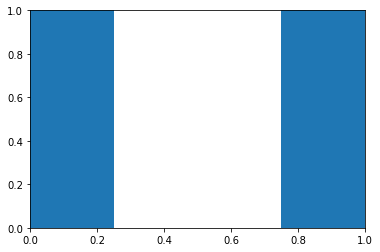

In [55]:
combined_scientific_name.value_counts().plot(kind='bar')

In [27]:
"orthoptera".upper()

'ORTHOPTERA'

In [28]:
wd[wd['classLabel'] == 'Insect']['orderLabel'].value_counts()

Series([], Name: orderLabel, dtype: int64)

<AxesSubplot:>

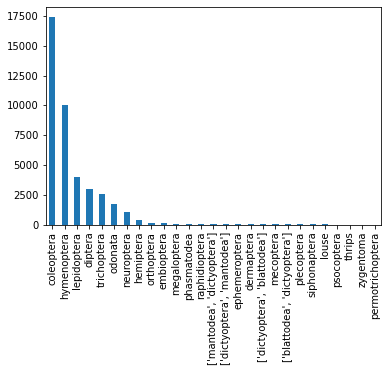

In [46]:
wd[wd['classLabel'] == 'Insect']['orderLabel'].value_counts().plot(kind='bar')
#wd[wd['classLabel'] == 'Insect']['familyLabel'].value_counts().plot(kind='bar')

<AxesSubplot:>

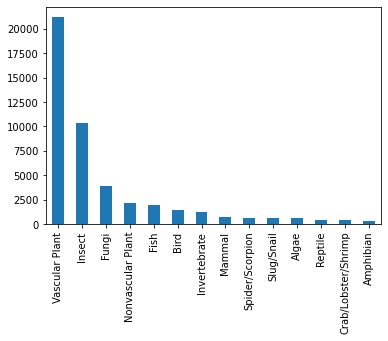

In [60]:
biodiversity['Category'].value_counts().plot(kind='bar')

In [54]:
endagered_species[endagered_species['scientific_name'] == 'scotia rugosa']

,id,scientific_name,common_name,where_listed,region_name,region,esa_listing_status,category


,class,classLabel,conservationStatus,conservationStatusLabel,differentFrom,differentFromLabel,endemicTo,endemicToLabel,family,familyLabel,order,orderLabel,resource,taxonCommonName,taxonName
11,http://www.wikidata.org/entity/q1390,Insect,NaN,NaN,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/q459180,noctuidae,http://www.wikidata.org/entity/q28319,lepidoptera,http://www.wikidata.org/entity/q3084,calymma communimacula,calymma communimacula
237,http://www.wikidata.org/entity/q1390,Insect,NaN,NaN,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/q459180,noctuidae,http://www.wikidata.org/entity/q28319,lepidoptera,http://www.wikidata.org/entity/q24505,lithacodia uncula,deltote uncula
293,http://www.wikidata.org/entity/q1390,Insect,NaN,NaN,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/q459180,noctuidae,http://www.wikidata.org/entity/q28319,lepidoptera,http://www.wikidata.org/entity/q25592,schinia rivulosa,schinia rivulosa
307,http://www.wikidata.org/entity/q1390,Insect,NaN,NaN,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/q459180,noctuidae,http://www.wikidata.org/entity/q28319,lepidoptera,http://www.wikidata.org/entity/q25639,"['hedge rustic', 'tholera cespitis']",tholera cespitis
312,http://www.wikidata.org/entity/q1390,Insect,NaN,NaN,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/q459180,noctuidae,http://www.wikidata.org/entity/q28319,lepidoptera,http://www.wikidata.org/entity/q25654,"['feathered gothic', 'tholera decimalis']",tholera decimalis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79396,http://www.wikidata.org/entity/q1390,Insect,NaN,NaN,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/q459180,noctuidae,http://www.wikidata.org/entity/q28319,lepidoptera,http://www.wikidata.org/entity/q2113674,"['feathered brindle', 'aporophyla australis']",aporophyla australis
86245,http://www.wikidata.org/entity/q1390,Insect,NaN,NaN,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/q459180,noctuidae,http://www.wikidata.org/entity/q28319,lepidoptera,http://www.wikidata.org/entity/q2137789,chrysodeixis chalcites,chrysodeixis chalcites
89674,http://www.wikidata.org/entity/q1390,Insect,NaN,NaN,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/q459180,noctuidae,http://www.wikidata.org/entity/q28319,lepidoptera,http://www.wikidata.org/entity/q2151568,scotia rugosa,scotia rugosa
89822,http://www.wikidata.org/entity/q1390,Insect,NaN,NaN,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/q459180,noctuidae,http://www.wikidata.org/entity/q28319,lepidoptera,http://www.wikidata.org/entity/q2152248,acronicta lepetita,acronicta lepetita


In [147]:
## get the first x letters from the scintific name
def get_first_letters_sn (scientific_name, num_letters):
    
    # cast to string
    scientific_name = str(scientific_name).lower()
    
    # clice the name
    ret_letters = scientific_name[0:num_letters]
    
    # return first num_letters letters
    return ret_letters
    
combined_scientific_name_letters = combined_scientific_name.apply(lambda x: get_first_letters_sn(x, 3))

print(combined_scientific_name_letters.groupby(combined_scientific_name_letters).size())

print(combined_scientific_name_letters.groupby(combined_scientific_name_letters).size().sort_values())

aaa     2
aap     5
aat     2
aba    34
abb     3
       ..
zyu     3
zyx     3
zyz     6
×ci     1
×fa     1
Length: 2649, dtype: int64
×fa       1
lug       1
lul       1
lya       1
maa       1
       ... 
tri    1287
lep    1322
pse    1354
car    1451
par    1834
Length: 2649, dtype: int64


In [148]:
more_than = combined_scientific_name_letters.groupby(combined_scientific_name_letters).size().sort_values() > 1
more_than.value_counts()

True     2181
False     468
dtype: int64